# Packages

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import numpy as np

## Standardizing Data

In [58]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

We have $404\times13$ 2-dimensional matrix for train data

$$\mathbf{X} _{train}=\left(\begin{matrix}x_{11}^{(train)}&x_{12}^{(train)}&\cdots&x_{1,13}^{(train)}\\x_{21}^{(train)}&x_{22}^{(train)}&\cdots&x_{2,13}^{(train)}\\\vdots&\ddots&\ddots&\vdots\\x_{404,1}^{(train)}&x_{404,2}^{(train)}&\cdots&x_{404,13}^{(train)}\end{matrix}\right)\tag{1}$$

In [59]:
train_data.shape

(404, 13)

We have $102\times13$ 2-dimensional matrix for test data

$$\mathbf{X} _{test}=\left(\begin{matrix}x_{11}^{(test)}&x_{12}^{(test)}&\cdots&x_{1,13}^{(test)}\\x_{21}^{(test)}&x_{22}^{(test)}&\cdots&x_{2,13}^{(test)}\\\vdots&\vdots&\ddots&\vdots\\x_{102,1}^{(test)}&x_{102,2}^{(test)}&\cdots&x_{102,13}^{(test)}\end{matrix}\right)\tag{2}$$

In [60]:
test_data.shape

(102, 13)

Using (1), we can get mean of training data like

$$\bar{x}_{.1}^{(train)}=\frac{1}{404}(x_{11}^{(train)}+x_{21}^{(train)}+\cdots+x_{404}^{(train)})\tag{3}$$

$$\bar{\mathbf{x}}=\left(\begin{matrix}\bar{x}_{.1}&\bar{x}_{.2}&\cdots&\bar{x}_{.13}\end{matrix}\right)\tag{4}$$

In [61]:
mean = train_data.mean(axis=0)

We can standardize data by

$$x_{ij}^{(std)}=\frac{x_{ij}-\bar{x} _{.j}}{s_{j}}\ \forall i=1, 2, \cdots, n, j=1, 2, \cdots, d \tag{5}$$


With (1), (4), we can get

$$\mathbf{X} _{train}-\bar{\mathbf{x}} _{train}=\left(\begin{matrix}x_{11}^{(train)}&x_{12}^{(train)}&\cdots&x_{1,13}^{(train)}\\x_{21}^{(train)}&x_{22}^{(train)}&\cdots&x_{2,13}^{(train)}\\\vdots&\vdots&\ddots&\vdots\\x_{404,1}^{(train)}&x_{404,2}^{(train)}&\cdots&x_{404,13}^{(train)}\end{matrix}\right)-\left(\begin{matrix}\bar{x}_{.1}^{(train)}&\bar{x}_{.2}^{(train)}&\cdots&\bar{x}_{.13}^{(train)}\end{matrix}\right)=\left(\begin{matrix}x_{11}^{(train)}-\bar{x}_{.1}^{(train)}&x_{12}^{(train)}-\bar{x}_{.2}^{(train)}&\cdots&x_{1,13}^{(train)}-\bar{x}_{.13}^{(train)}\\x_{21}^{(train)}-\bar{x}_{.1}^{(train)}&x_{22}^{(train)}-\bar{x}_{.2}^{(train)}&\cdots&x_{2,13}^{(train)}-\bar{x}_{.13}^{(train)}\\\vdots&\vdots&\ddots&\vdots\\x_{404,1}^{(train)}-\bar{x}_{.1}^{(train)}&x_{404,2}^{(train)}-\bar{x}_{.2}^{(train)}&\cdots&x_{404,13}^{(train)}-\bar{x}_{.13}^{(train)}\end{matrix}\right)\tag{6}$$

In [62]:
train_data -= mean

Standard deviation of training data can be calculated by

$$s_j^{(train)}=\sqrt{\frac{1}{n_{train}-1}\sum^{n_{train}}_{i=1}(x_{ij}^{(train)}-\bar{x} _{.j}^{(train)})^2}\tag{7}$$

$$\mathbf{s}_{train}=\sqrt{\frac{1}{n_{train}-1}diag((\mathbf{X}^{(train)}-\bar{\mathbf{x}}^{(train)})^T(\mathbf{X}^{(train)}-\bar{\mathbf{x}}^{(train)}))}\tag{8}$$

$$\mathbf{s}_{train}=\left(\begin{matrix}s_1^{(train)}&s_2^{(train)}&\cdots&s_{13}^{(train)}\end{matrix}\right)\tag{9}$$

In [63]:
std = train_data.std(axis=0)

By (6), (9) we can calculate standardized train data as

$$\mathbf{X} _{train}^{(std)}=(\mathbf{X} _{train}-\bar{\mathbf{x}}_{train})⊘\mathbf{s}=\left(\begin{matrix}x_{11}^{(train)}-\bar{x}_{.1}^{(train)}&x_{12}^{(train)}-\bar{x}_{.2}^{(train)}&\cdots&x_{113}^{(train)}-\bar{x}_{.13}^{(train)}\\x_{21}^{(train)}-\bar{x}_{.1}^{(train)}&x_{22}^{(train)}-\bar{x}_{.2}^{(train)}&\cdots&x_{213}^{(train)}-\bar{x}_{.13}^{(train)}\\\vdots&\vdots&\ddots&\vdots\\x_{4041}^{(train)}-\bar{x}_{.1}^{(train)}&x_{4042}^{(train)}-\bar{x}_{.2}^{(train)}&\cdots&x_{40413}^{(train)}-\bar{x}_{.13}^{(train)}\end{matrix}\right)⊘\left(\begin{matrix}s_1^{(train)}&s_2^{(train)}&\cdots&s_{13}^{(train)}\end{matrix}\right)\tag{10}$$

$$=\left(\begin{matrix}\frac{x_{11}^{(train)}-\bar{x}_{.1}^{(train)}}{s_1^{(train)}}&\frac{x_{12}^{(train)}-\bar{x}_{.2}^{(train)}}{s_2^{(train)}}&\cdots&\frac{x_{113}^{(train)}-\bar{x}_{.13}^{(train)}}{s_{13}^{(train)}}\\\frac{x_{21}^{(train)}-\bar{x}_{.1}^{(train)}}{s_1^{(train)}}&\frac{x_{22}^{(train)}-\bar{x}_{.2}^{(train)}}{s_2^{(train)}}&\cdots&\frac{x_{213}^{(train)}-\bar{x}_{.13}^{(train)}}{s_{13}^{(train)}}\\\vdots&\vdots&\ddots&\vdots\\\frac{x_{4041}^{(train)}-\bar{x}_{.1}^{(train)}}{s_1^{(train)}}&\frac{x_{4042}^{(train)}-\bar{x}_{.2}^{(train)}}{s_2^{(train)}}&\cdots&\frac{x_{40413}^{(train)}-\bar{x}_{.13}^{(train)}}{s_{13}^{(train)}}\end{matrix}\right)\tag{11}$$

In [64]:
train_data /= std

Like (3)-(11), we can get standardized test data as

$$\mathbf{X} _{test}^{(std)}=\left(\begin{matrix}\frac{x_{11}^{(test)}-\bar{x}_{.1}^{(test)}}{s_1^{(test)}}&\frac{x_{12}^{(test)}-\bar{x}_{.2}^{(test)}}{s_2^{(test)}}&\cdots&\frac{x_{113}^{(test)}-\bar{x}_{.13}^{(test)}}{s_{13}^{(test)}}\\\frac{x_{21}^{(test)}-\bar{x}_{.1}^{(test)}}{s_1^{(test)}}&\frac{x_{22}^{(test)}-\bar{x}_{.2}^{(test)}}{s_2^{(test)}}&\cdots&\frac{x_{213}^{(test)}-\bar{x}_{.13}^{(test)}}{s_{13}^{(test)}}\\\vdots&\vdots&\ddots&\vdots\\\frac{x_{102,1}^{(test)}-\bar{x}_{.1}^{(test)}}{s_1^{(test)}}&\frac{x_{102,2}^{(test)}-\bar{x}_{.2}^{(test)}}{s_2^{(test)}}&\cdots&\frac{x_{102,13}^{(test)}-\bar{x}_{.13}^{(test)}}{s_{13}^{(test)}}\end{matrix}\right)\tag{12}$$

In [65]:
test_data -= mean
test_data /= std

## Model Building

On basic model, have input layer like

$$\mathbf{x} _{1\times 13}\tag{13}$$

Among total 2 hidden layer, first layer is

$$\mathbf{h}^{(1)}_{1\times64}=ReLU(\mathbf{W}^{(1)}_{13\times64}\mathbf{x}_{1\times 13}+\mathbf{b}^{(1)}_{1\times64})\tag{14}$$

Second layer is

$$\mathbf{h}^{(2)}_{1\times64}=ReLU(\mathbf{h}^{(1)}_{1\times 64}\mathbf{W}^{(2)}_{64\times64}+\mathbf{b}^{(2)}_{1\times64})\tag{15}$$

ReLU function can be defined by

$$ReLU(x)=max(0, x) \tag{16}$$

Lastly, we can denote output layer as

$$\hat{y}=\mathbf{h}^{(2)}_{1\times64}\mathbf{W}^{(3)}_{64\times1}+b^{3}\tag{17}$$

In [ ]:
model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
])

Using root mean square propagation(RMSprop) as the optimizer with mean squared error (MSE) as the loss function. During training, use mean absolute error (MAE) as the evaluation metric.

$$MSE=\frac{1}{n}\sum^n_{i=1}(y_i-\hat{y} _i)^2\tag{18}$$

$$MAE=\frac{1}{n}\sum^n_{i=1}|y_i-\hat{y} _i|\tag{19}$$

In [67]:
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

We can make this model building sequence as a function like

In [68]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

## $k$-fold Cross Validation

We can make algorithm for $k$-fold cross valiation and recording scores like

<hr style="width: 100%; margin-left: 0; margin-bottom: 0px; border: 0.5px solid black;">
<strong>Algorithm</strong> k-fold
<hr style="width: 100%; margin-left: 0; margin-top: 0px; margin-bottom: 0px; border: 0.5px solid black;">
<strong>Input</strong> $404\times 13$ 2-dimensional matrix $\mathbf{X}_{train}$, $404\times1$ vector $\mathbf{y}_{train}$, Number of folds $k=4$, number of epochs $E=300$<br>
&emsp; <strong>Let</strong> all_score ← empty list<br>
&emsp; <strong>Let</strong> $n_{fold}$ ← $404/4=101$
&emsp; <strong>for</strong> $i=0$ <strong>to</strong> $3$ <strong>do</strong><br>

&emsp;&emsp; <strong>Let</strong> $\mathbf{X}_{101\times13}^{(val)}$ ← rows [$in_{fold}:(i+1)n_{fold}$ of $\mathbf{X}^{(train)}_{404\times13}$]<br>
&emsp;&emsp; <strong>Let</strong> $\mathbf{y}_{101\times1}^{(val)}$ ← corresponding rows of $\mathbf{y}_{404\times1}^{(train)}$<br>

&emsp;&emsp; <strong>Let</strong> $\mathbf{X}_{303\times13}^{(partial)}$ ← rows of $\mathbf{X}_{404\times13}^{(train)}$ excluding fold $i$<br>
&emsp;&emsp; <strong>Let</strong> $\mathbf{y}_{303\times1}^{(partial)}$ ← corresponding rows of $\mathbf{y}_{404\times1}^{(train)}$<br>

&emsp;&emsp; <strong>Let</strong> model ← build(model)<br>
&emsp;&emsp; <strong>Train</strong>  model on $(\mathbf{X}_{303\times13}^{(partial)}$, $\mathbf{y}_{303\times1}^{(partial)})$ for $E=300$ epochs using RMSprop + MSE<br>

&emsp;&emsp; <strong>Let</strong> $MAE_i$ ← evaluate model on $(\mathbf{X}_{101\times13}^{(partial)}$, $\mathbf{y}_{101\times1}^{(partial)})$<br>
&emsp;&emsp; <strong>Append</strong> $MAE_i$ <strong>to</strong> all_scores<br>

<strong>Output</strong> all_scores$\in \mathbb{R}_{1\times4}$
<hr style="width: 100%; margin-left: 0; margin-top: 0px; border: 0.5px solid black;">

With algorithm, we can apply $k$-fold cross validation on python as

In [95]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 300
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


We can see the validation mean absolute error for all 4 folds by

$$\rm{all\_scores}=\left(\begin{matrix}MAE_1^{(val)}&MAE_2^{(val)}&MAE_3^{(val)}&MAE_4^{(val)}\end{matrix}\right)\tag{20}$$

In [96]:
all_scores

[2.0594661235809326,
 2.4632434844970703,
 2.5458452701568604,
 2.3783349990844727]

Last, we can get final mean of validation mean absolute error for all 4 folds. However, this value is only final output of our model, we can't check whether it is overfitted or underfitted

In [97]:
np.mean(all_scores)

2.361722469329834

<hr style="width: 100%; margin-left: 0; margin-bottom: 0px; border: 0.5px solid black;">
<strong>Algorithm</strong> k-fold with history
<hr style="width: 100%; margin-left: 0; margin-top: 0px; margin-bottom: 0px; border: 0.5px solid black;">
<strong>Input</strong> $404\times 13$ 2-dimensional matrix $\mathbf{X}_{train}$, $404\times1$ vector $\mathbf{y}_{train}$, Number of folds $k=4$, number of epochs $E=300$<br>
&emsp; <strong>Let</strong> all_mae_histories ← empty list<br>
&emsp; <strong>Let</strong> $n_{fold}$ ← $404/4=101$
&emsp; <strong>for</strong> $i=0$ <strong>to</strong> $3$ <strong>do</strong><br>

&emsp;&emsp; <strong>Let</strong> $\mathbf{X}_{101\times13}^{(val)}$ ← rows [$in_{fold}:(i+1)n_{fold}$ of $\mathbf{X}^{(train)}_{404\times13}$]<br>
&emsp;&emsp; <strong>Let</strong> $\mathbf{y}_{101\times1}^{(val)}$ ← corresponding rows of $\mathbf{y}_{404\times1}^{(train)}$<br>

&emsp;&emsp; <strong>Let</strong> $\mathbf{X}_{303\times13}^{(partial)}$ ← rows of $\mathbf{X}_{404\times13}^{(train)}$ excluding fold $i$<br>
&emsp;&emsp; <strong>Let</strong> $\mathbf{y}_{303\times1}^{(partial)}$ ← corresponding rows of $\mathbf{y}_{404\times1}^{(train)}$<br>

&emsp;&emsp; <strong>Let</strong> model ← build(model)<br>
&emsp;&emsp; <strong>Train</strong>  model on $(\mathbf{X}_{303\times13}^{(partial)}$, $\mathbf{y}_{303\times1}^{(partial)})$ for $E=300$ epochs using RMSprop + MSE<br>

&emsp;&emsp; <strong>Let</strong> mae_history ← validation MAE for each epoch<br>
&emsp;&emsp; <strong>Append</strong> mae_history <strong>to</strong> all_mae_histories<br>

<strong>Output</strong> all_mae_histories$\in \mathbb{R}_{4\times300}$
<hr style="width: 100%; margin-left: 0; margin-top: 0px; border: 0.5px solid black;">

With algorithm, we can apply $k$-fold cross validation with history on python as

In [98]:
num_epochs = 300
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=100, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


As shown in the pseudocode, all_mae_histories have validation $MAE$ over 300 epochs for each of 4 folds. We can denote all_mae_histories as

$$\rm{all\_mae\_histories}=\left(\begin{matrix}\rm{mae\_history}^{(1)}\\\rm{mae\_history}^{(2)}\\\rm{mae\_history}^{(3)}\\\rm{mae\_history}^{(4)}\\\end{matrix}\right)\tag{21}$$

On (21), each mae_history can be denoted by

$$\rm{mae\_history}^{(1)}=\left(\begin{matrix}MAE_{1}^{(1)}&MAE_{2}^{(1)}&\cdots&MAE_{300}^{(1)}\end{matrix}\right)\tag{22}$$

With (21), (22), all_mae_histories can be denoted by

$$\rm{all\_mae\_histories}=\left(\begin{matrix}MAE_{1}^{(1)}&MAE_{2}^{(1)}&\cdots&MAE_{300}^{(1)}\\MAE_{1}^{(2)}&MAE_{2}^{(2)}&\cdots&MAE_{300}^{(2)}\\MAE_{1}^{(3)}&MAE_{2}^{(3)}&\cdots&MAE_{300}^{(3)}\\MAE_{1}^{(4)}&MAE_{2}^{(4)}&\cdots&MAE_{300}^{(4)}\\\end{matrix}\right)\tag{23}$$

In [99]:
np.array(all_mae_histories).shape

(4, 300)

We can get mean of validation $MAE$ on fold #3, mean of 300 epochs

In [100]:
np.array(all_mae_histories[0]).mean(axis=0)

3.327576664686203

We can get mean of validation $MAE$ of 0th epoch on each folds

In [101]:
np.mean([x[0] for x in all_mae_histories])

21.371325969696045

We can get the mean of validation MAE across the 4 folds for each epoch

In [102]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

By plotting the average validation MAE over epochs, we can see model’s generalization performance

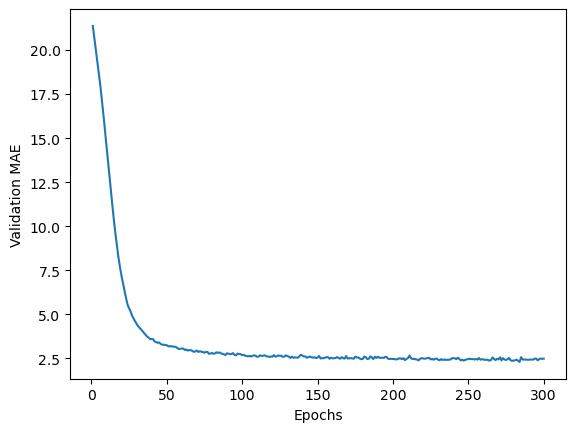

In [103]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

To reduce effect of high variance in initial epoches, omit first 10 epochs of validation MAE.

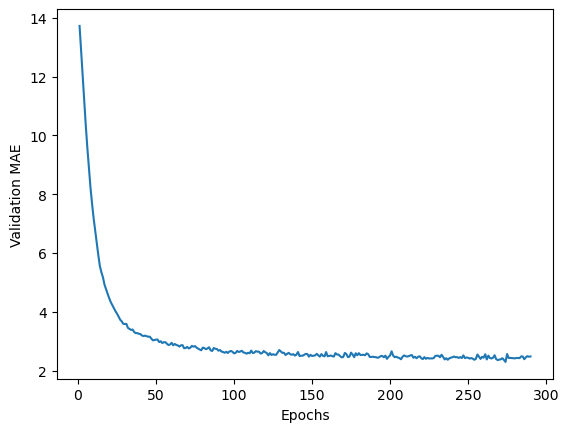

In [104]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [105]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 11.4752 - mae: 2.4055


In [106]:
test_mae_score

2.578791856765747

In [107]:
predictions = model.predict(test_data)
predictions[0]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([7.9794154], dtype=float32)

## Load data

Load MNIST data

In [10]:
(train_images, train_labels), _ = mnist.load_data()

Transform $28\times28$ matrix into $784\times1$ vector

In [11]:
train_images = train_images.reshape((60000, 28 * 28))

For faster training, normalize each pixel value (0–255) to the 0–1

In [12]:
train_images = train_images.astype("float32") / 255

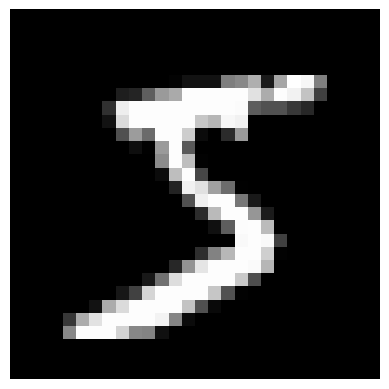

In [49]:
plt.imshow(train_images[0].reshape(28, 28), cmap='gray')
plt.axis('off')
plt.show()

Add white-noise channel to MNIST data

In [13]:
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

We can see that the random noise image was added after the orginal image

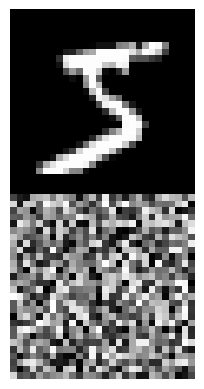

In [56]:
plt.imshow(train_images_with_noise_channels[0].reshape(56, 28), cmap='gray')
plt.axis('off')
plt.show()

Add all-zero channel to MNIST data, added feature that affect to the data

Add all-zero channel to MNIST data, added feature don't much effect on raw data

In [14]:
train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

We can see that the all-zero(black) image was added after the orginal image

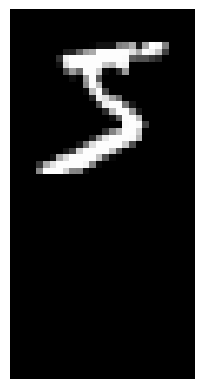

In [37]:
plt.imshow(train_images_with_zeros_channels[0].reshape(56, 28), cmap='gray')
plt.axis('off')
plt.show()

Make model with 1 hidden layer

In [15]:
def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

In [16]:
model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.6977 - loss: 1.0414 - val_accuracy: 0.8960 - val_loss: 0.3394
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9121 - loss: 0.2846 - val_accuracy: 0.9427 - val_loss: 0.1963
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9441 - loss: 0.1750 - val_accuracy: 0.9497 - val_loss: 0.1600
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9619 - loss: 0.1257 - val_accuracy: 0.9484 - val_loss: 0.1612
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9719 - loss: 0.0893 - val_accuracy: 0.9570 - val_loss: 0.1456
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9794 - loss: 0.0670 - val_accuracy: 0.9647 - val_loss: 0.1272
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9856 - loss: 0.0458 - val_accuracy: 0.9622 - val_loss: 0.1334
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9903 - loss: 0.0323 - val_accu

In [17]:
model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8583 - loss: 0.4905 - val_accuracy: 0.9588 - val_loss: 0.1500
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9632 - loss: 0.1253 - val_accuracy: 0.9672 - val_loss: 0.1133
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9762 - loss: 0.0842 - val_accuracy: 0.9751 - val_loss: 0.0855
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9824 - loss: 0.0593 - val_accuracy: 0.9748 - val_loss: 0.0848
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9877 - loss: 0.0426 - val_accuracy: 0.9767 - val_loss: 0.0774
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9914 - loss: 0.0317 - val_accuracy: 0.9764 - val_loss: 0.0813
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9943 - loss: 0.0225 - val_accuracy: 0.9785 - val_loss: 0.0752
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9958 - loss: 0.0169 - val_accu

Model with noise has low accuracy 

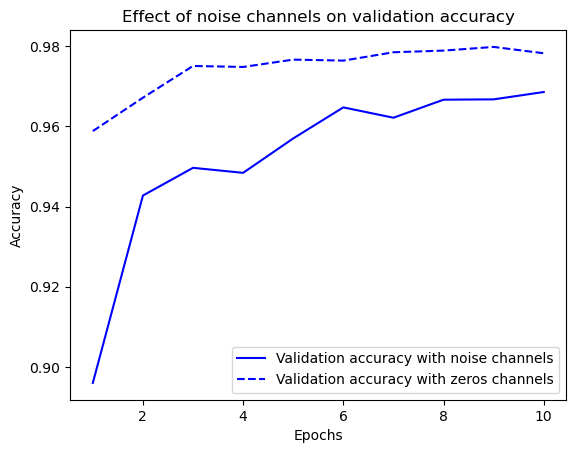

In [19]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [20]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

Make random suffled data to check if the model memorize the data

In [21]:
random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [22]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

validation accuracy don't increase, validation loss increase, poor performance

In [23]:
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.1054 - loss: 2.3254 - val_accuracy: 0.1101 - val_loss: 2.3074
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.1205 - loss: 2.2972 - val_accuracy: 0.1013 - val_loss: 2.3111
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.1279 - loss: 2.2881 - val_accuracy: 0.1088 - val_loss: 2.3160
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.1447 - loss: 2.2734 - val_accuracy: 0.1036 - val_loss: 2.3300
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.1543 - loss: 2.2594 - val_accuracy: 0.1033 - val_loss: 2.3321
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.1667 - loss: 2.2392 - val_accuracy: 0.1045 - val_loss: 2.3422
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.1824 - loss: 2.2143 - val_accuracy: 0.1067 - val_loss: 2.3542
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.1999 - loss: 2.1880 - 

In [24]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

In [25]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

Setting very high learning rate($\eta=1$)

In [26]:
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [27]:
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.4101 - loss: 3221.1531 - val_accuracy: 0.2223 - val_loss: 2.2484
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1768 - loss: 3.0058 - val_accuracy: 0.2066 - val_loss: 3.6887
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1971 - loss: 2.4656 - val_accuracy: 0.2222 - val_loss: 2.2029
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.2006 - loss: 2.5704 - val_accuracy: 0.2175 - val_loss: 2.0857
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.2149 - loss: 2.3048 - val_accuracy: 0.2198 - val_loss: 2.2811
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.2184 - loss: 2.3600 - val_accuracy: 0.2512 - val_loss: 2.9888
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.2291 - loss: 2.3985 - val_accuracy: 0.2431 - val_loss: 2.0892
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.2321 - loss: 2.3157 - val_a

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

Setting appropriate learning rate $\eta=0.01$

In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Small model with dense=10

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()